# pandas練習


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# Series
順序のある辞書的な特徴を持った1次元配列のようなデータ。Seriesは辞書のキーに相当する値として「インデックス」を持つ。
デフォルトでintegerのインデックスが作られる。（配列の添字とは異なる点に注意）  

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

**出力された値のうち、左側がインデックス。右側が値**

```
インデックス→0     1←値
              1     3
              2     5
              3   NaN
              ...
```

Seriesオブジェクトのindexプロパティを取得すると、int64の型を持つIndexオブジェクトであることがわかる。

In [3]:
s.index #integerのindex

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

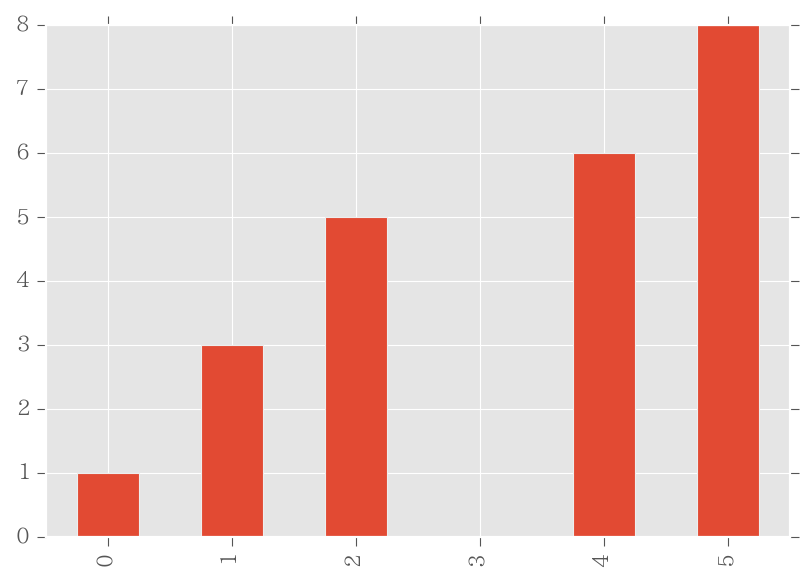

In [4]:
# Seriesを棒グラフでプロット
s.plot('bar')

**dropでインデックス値を指定した削除**

配列の添字ではないので削除しても値は整列しない。

In [5]:
s.drop(3)

0    1
1    3
2    5
4    6
5    8
dtype: float64

In [6]:
s.drop([1,2,3])

0    1
4    6
5    8
dtype: float64

**整数以外のインデックスにすることも可能**

Seriesの作成時にindexにする配列を指定できる。文字列をインデックスとしてもったSeriesを生成する例

In [7]:
s2 = pd.Series([2, 4, 6, 8], index=['a', 'b', 'c', 'd'])
s2

a    2
b    4
c    6
d    8
dtype: int64

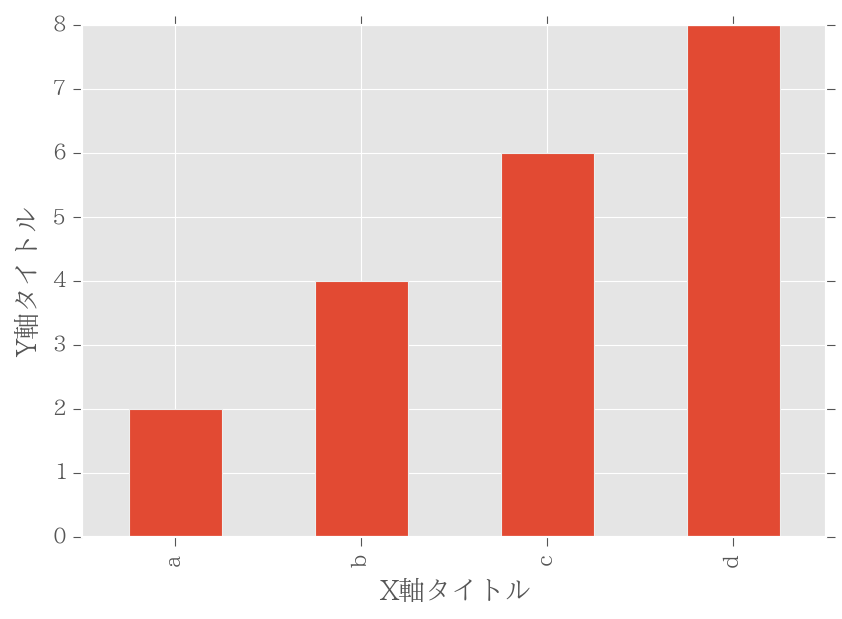

In [8]:
# s2のSeriesを棒グラフでプロットしてみる
ax = s2.plot('bar')
ax.set_xlabel('X軸タイトル')
ax.set_ylabel('Y軸タイトル')

**日付のインデックス**

統計データを扱うときには日付のインデックスがよく使われる。
pandasでは日付インデックスを簡単に生成する関数が用意されている。

次の例は、2016年2月1日から4日分の値をもつインデックスを生成する例

In [9]:
pd.date_range('20160201', periods=4)

DatetimeIndex(['2016-02-01', '2016-02-02', '2016-02-03', '2016-02-04'], dtype='datetime64[ns]', freq='D', tz=None)

2016年2月1日を開始日付として、1日間隔で4個の日付Indexを生成した。

（pd.date_range?でDocstring参照）

**日付のインデックスを持ったSeriesを作成**

インデックスと値の個数は一致する必要がある。

In [10]:
# 日付のインデックスを持ったSeries
s3 = pd.Series(np.arange(10, 60, 10),   #10〜60未満まで、10ずつ増加
               index=pd.date_range('20160201', periods=5))
s3

2016-02-01    10
2016-02-02    20
2016-02-03    30
2016-02-04    40
2016-02-05    50
Freq: D, dtype: int64

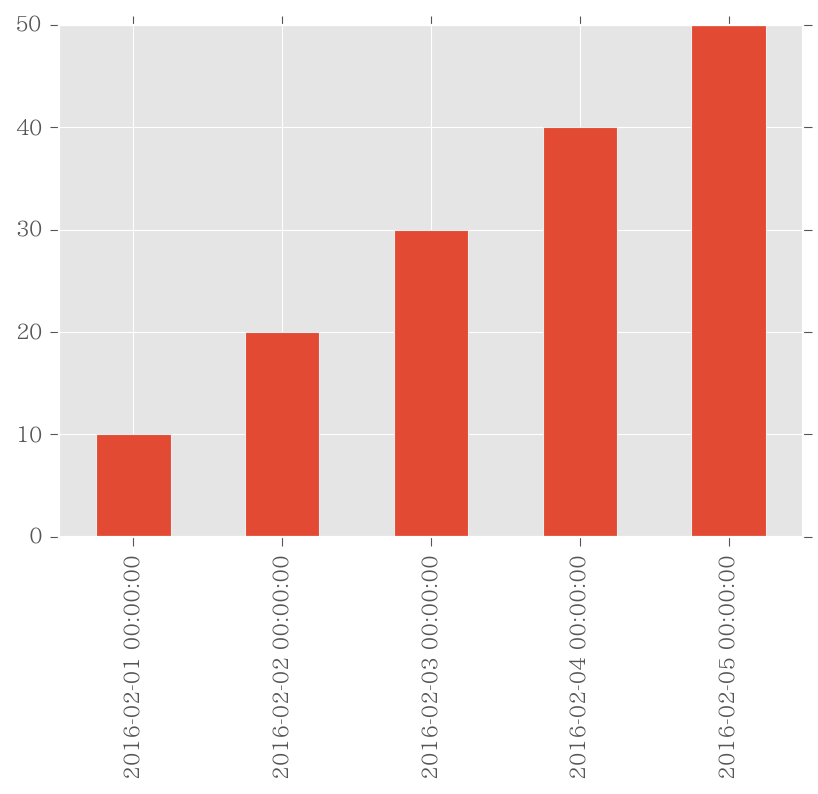

In [11]:
#プロット
s3.plot('bar')

In [12]:
#6時間おきのデータに拡張
s3.asfreq('6H')

2016-02-01 00:00:00    10
2016-02-01 06:00:00   NaN
2016-02-01 12:00:00   NaN
2016-02-01 18:00:00   NaN
2016-02-02 00:00:00    20
2016-02-02 06:00:00   NaN
2016-02-02 12:00:00   NaN
2016-02-02 18:00:00   NaN
2016-02-03 00:00:00    30
2016-02-03 06:00:00   NaN
2016-02-03 12:00:00   NaN
2016-02-03 18:00:00   NaN
2016-02-04 00:00:00    40
2016-02-04 06:00:00   NaN
2016-02-04 12:00:00   NaN
2016-02-04 18:00:00   NaN
2016-02-05 00:00:00    50
Freq: 6H, dtype: float64

In [13]:
# NaNを埋める ffill, bfill..

s3.asfreq('6H', method='ffill')

2016-02-01 00:00:00    10
2016-02-01 06:00:00    10
2016-02-01 12:00:00    10
2016-02-01 18:00:00    10
2016-02-02 00:00:00    20
2016-02-02 06:00:00    20
2016-02-02 12:00:00    20
2016-02-02 18:00:00    20
2016-02-03 00:00:00    30
2016-02-03 06:00:00    30
2016-02-03 12:00:00    30
2016-02-03 18:00:00    30
2016-02-04 00:00:00    40
2016-02-04 06:00:00    40
2016-02-04 12:00:00    40
2016-02-04 18:00:00    40
2016-02-05 00:00:00    50
Freq: 6H, dtype: int64

In [14]:
# interpolateで補間
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.interpolate.html
s4 = s3.asfreq('6H').interpolate()
s4

2016-02-01 00:00:00    10.0
2016-02-01 06:00:00    12.5
2016-02-01 12:00:00    15.0
2016-02-01 18:00:00    17.5
2016-02-02 00:00:00    20.0
2016-02-02 06:00:00    22.5
2016-02-02 12:00:00    25.0
2016-02-02 18:00:00    27.5
2016-02-03 00:00:00    30.0
2016-02-03 06:00:00    32.5
2016-02-03 12:00:00    35.0
2016-02-03 18:00:00    37.5
2016-02-04 00:00:00    40.0
2016-02-04 06:00:00    42.5
2016-02-04 12:00:00    45.0
2016-02-04 18:00:00    47.5
2016-02-05 00:00:00    50.0
Freq: 6H, dtype: float64

# DataFrame
データフレームは、インデックスと列のデータを持つExcelのスプレットシート的なデータ。


In [15]:
# 日付のインデックスを作成。あとでこの日付インデックスをDataFrameに使う
date_index = pd.date_range('20150101', periods=6)
date_index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [16]:
# 6行4列の標準正規分布のランダムなデータを作成
data = np.random.randn(6, 4)
data

array([[ 0.7394411 , -0.35424291,  0.23019671, -1.12367034],
       [-0.94371399, -0.08687631,  0.38168523,  0.46849594],
       [ 1.14066889,  1.32184444, -1.08947544, -0.94100116],
       [-0.21827812,  0.84284066, -0.17025253,  0.38081734],
       [ 0.77239591,  1.52166487,  1.91746134,  2.07991977],
       [ 0.17094147,  2.0722489 ,  0.89383433, -0.65215615]])

In [17]:
# データとインデックスを合わせてDataFrameを作成
df = pd.DataFrame(data, index=date_index, columns=list('ABCD'))
df

,A,B,C,D
2015-01-01,0.739441,-0.354243,0.230197,-1.123670
2015-01-02,-0.943714,-0.086876,0.381685,0.468496
2015-01-03,1.140669,1.321844,-1.089475,-0.941001
2015-01-04,-0.218278,0.842841,-0.170253,0.380817
2015-01-05,0.772396,1.521665,1.917461,2.079920
2015-01-06,0.170941,2.072249,0.893834,-0.652156


日付インデックスをもつ6行4列のデータフレーム。4列はそれぞれABCD列というラベルが付いている。



In [18]:
list(range(10, 50, 10))

[10, 20, 30, 40]

In [19]:
df2 = pd.DataFrame({'A': 1.0,
                    'B': pd.Timestamp('20140102'),
                    'C': pd.Series(1, index=list(range(10, 50, 10)), dtype='float32'),  #ここのインデックスがDataFrameのインデックスになる
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(['test', 'train', 'test', 'train']),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
10,1,2014-01-02,1,3,test,foo
20,1,2014-01-02,1,3,train,foo
30,1,2014-01-02,1,3,test,foo
40,1,2014-01-02,1,3,train,foo


In [20]:
# df2のそれぞれの列ごとの型を確認
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## データの閲覧

head(), tail()でデータの先頭、末尾を参照


In [21]:
df.head()

,A,B,C,D
2015-01-01,0.739441,-0.354243,0.230197,-1.123670
2015-01-02,-0.943714,-0.086876,0.381685,0.468496
2015-01-03,1.140669,1.321844,-1.089475,-0.941001
2015-01-04,-0.218278,0.842841,-0.170253,0.380817
2015-01-05,0.772396,1.521665,1.917461,2.079920


In [22]:
df.tail(3)

,A,B,C,D
2015-01-04,-0.218278,0.842841,-0.170253,0.380817
2015-01-05,0.772396,1.521665,1.917461,2.079920
2015-01-06,0.170941,2.072249,0.893834,-0.652156


index, colums, valueでインデックス、列、値を参照可能

In [23]:
df.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06'],
              dtype='datetime64[ns]', freq='D', tz=None)

In [24]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [25]:
df.values

array([[ 0.7394411 , -0.35424291,  0.23019671, -1.12367034],
       [-0.94371399, -0.08687631,  0.38168523,  0.46849594],
       [ 1.14066889,  1.32184444, -1.08947544, -0.94100116],
       [-0.21827812,  0.84284066, -0.17025253,  0.38081734],
       [ 0.77239591,  1.52166487,  1.91746134,  2.07991977],
       [ 0.17094147,  2.0722489 ,  0.89383433, -0.65215615]])

### ソート
B列の値でソート

In [26]:
df.sort('B')

,A,B,C,D
2015-01-01,0.739441,-0.354243,0.230197,-1.123670
2015-01-02,-0.943714,-0.086876,0.381685,0.468496
2015-01-04,-0.218278,0.842841,-0.170253,0.380817
2015-01-03,1.140669,1.321844,-1.089475,-0.941001
2015-01-05,0.772396,1.521665,1.917461,2.079920
2015-01-06,0.170941,2.072249,0.893834,-0.652156


このデータフレームは軸を2つ持つ。

In [27]:
df.axes

[DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
                '2015-01-05', '2015-01-06'],
               dtype='datetime64[ns]', freq='D', tz=None),
 Index(['A', 'B', 'C', 'D'], dtype='object')]

軸1(列の軸インデックス)の降順でソート

In [28]:
df.sort(axis=1, ascending=False)

,D,C,B,A
2015-01-01,-1.123670,0.230197,-0.354243,0.739441
2015-01-02,0.468496,0.381685,-0.086876,-0.943714
2015-01-03,-0.941001,-1.089475,1.321844,1.140669
2015-01-04,0.380817,-0.170253,0.842841,-0.218278
2015-01-05,2.079920,1.917461,1.521665,0.772396
2015-01-06,-0.652156,0.893834,2.072249,0.170941


# データの選択

1列を指定すると、Seriesとして取得できる

In [29]:
df['A']   #df.Aでも可

2015-01-01    0.739441
2015-01-02   -0.943714
2015-01-03    1.140669
2015-01-04   -0.218278
2015-01-05    0.772396
2015-01-06    0.170941
Freq: D, Name: A, dtype: float64

行の番号を指定して行の範囲を指定して取得する。

In [30]:
df[0:3]

,A,B,C,D
2015-01-01,0.739441,-0.354243,0.230197,-1.123670
2015-01-02,-0.943714,-0.086876,0.381685,0.468496
2015-01-03,1.140669,1.321844,-1.089475,-0.941001


** []での操作は空気を読みすぎて、慣れていないとわかりにくい？ 明示的な関数での取得が推奨されているっぽい？ **

> Note While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.


In [31]:
# たとえば、columnとindexに同じ値がある場合にどちらが使われるのか？
df_test = pd.DataFrame(data=np.arange(9).reshape(3,3), columns=list('ABC'), index=list('ABC'))
df_test

,A,B,C
A,0,1,2
B,3,4,5
C,6,7,8


In [32]:
df_test['B']   #1つ指定の時は列のSeries

A    1
B    4
C    7
Name: B, dtype: int64

In [33]:
df_test['B':'C'] #範囲指定の時は選択行のDataFrame

,A,B,C
B,3,4,5
C,6,7,8


## 明示的な選択関数を使ったデータ取得

### loc

locはインデックスで指定。

データフレームに対して、行インデックス、列インデックスを範囲指定して抽出する

** df.loc[行インデックス範囲, 列インデックス範囲] **

範囲はnumpyのスライシングの表記が使える。
```
df.loc[:,:]  #全行全列
df.loc[3,:]  #インデックス=3の行の全列（順序としての3行目ではないので注意）
```

In [34]:
df.loc['20150102':'20150104', 'A':'B']

,A,B
2015-01-02,-0.943714,-0.086876
2015-01-03,1.140669,1.321844
2015-01-04,-0.218278,0.842841


In [35]:
df.loc[:, 'A']  # 1列取得だとSeriesになる

2015-01-01    0.739441
2015-01-02   -0.943714
2015-01-03    1.140669
2015-01-04   -0.218278
2015-01-05    0.772396
2015-01-06    0.170941
Freq: D, Name: A, dtype: float64

In [36]:
# データフレームとして取得したい場合は、配列で列指定する。
df.loc[:, ['A']]

,A
2015-01-01,0.739441
2015-01-02,-0.943714
2015-01-03,1.140669
2015-01-04,-0.218278
2015-01-05,0.772396
2015-01-06,0.170941


In [45]:
# ちなみに１行取得でもSeriesになる。この場合のインデックスは列になる。
df.loc['20150102', :]

A   -0.943714
B   -0.086876
C    0.381685
D    0.468496
Name: 2015-01-02 00:00:00, dtype: float64

**DataFrameとIndex**
データフレームはテーブルのような構造になっているが、行のインデックスと、列のインデックスを持つ。

- 1列だけ取得した時は行のIndexをもったSeriesが取れる
- 1行だけ取得した時は列のIndexをもったSeriesが取れる

![DataFrameとIndex](img/pandas01.png)

### iloc

ilocは配列の添字のような順序で指定。

データフレームに対して、行番号、列番号を範囲指定して抽出する

** df.iloc[行番号範囲, 列番号範囲] **

範囲はnumpyのスライシングの表記が使える。
```
df.iloc[:,:]  #全行全列
df.iloc[3,:]  #行順序=3の行の全列
```

In [37]:
df.iloc[1:4, :2]  #ilocでは順序（番号）を指定して選択, 1~3行目と、0~1列目

,A,B
2015-01-02,-0.943714,-0.086876
2015-01-03,1.140669,1.321844
2015-01-04,-0.218278,0.842841


### ix

ixはlocとilocのいいとこ取りで、インデックスも指定できるし配列の添字のような順序でも指定できる。


In [38]:
df.ix['20150102': '20150104', :2]  #行はインデックスで指定。列は番号で指定

,A,B
2015-01-02,-0.943714,-0.086876
2015-01-03,1.140669,1.321844
2015-01-04,-0.218278,0.842841


### at, iat

セルを指定して、スカラー値を取得する。iatはそれの行番号、列番号版


In [39]:
df.at[date_index[1], 'B']   # atでは日付の値に文字列指定はできない

-0.086876308801578511

In [40]:
df.iat[1, 1]   # 上記の順序行番号、列番号版

-0.086876308801578511

## ピボットテーブル

In [41]:
# 各列をSeriesとして作成
df3 = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] *2,
                   'D' : np.random.rand(12),
                   'E' : np.random.rand(12)})
df3

,A,B,C,D,E
0,one,A,foo,0.028245,0.484800
1,one,B,foo,0.793262,0.457195
2,two,C,foo,0.250887,0.387299
3,three,A,bar,0.124481,0.541064
4,one,B,bar,0.208759,0.722716
5,one,C,bar,0.065866,0.656677
6,two,A,foo,0.281756,0.569272
7,three,B,foo,0.286722,0.608663
8,one,C,foo,0.818133,0.910560
9,one,A,bar,0.889620,0.261545


In [43]:
# ピボットテーブルを作成
# A列をインデックスに、C列の値を列として、D列の値を集計関数sumで集計

pt = pd.pivot_table(df3, values='D', index=['A'], columns=['C'], aggfunc=np.sum)
pt

C,bar,foo
A,,
one,1.164245,1.639641
three,0.388551,0.286722
two,0.643550,0.532643


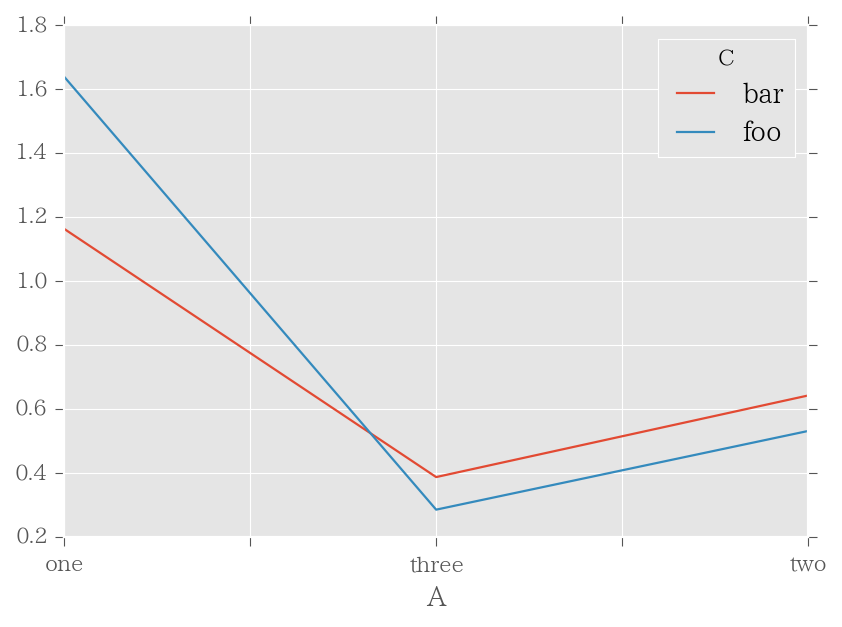

In [44]:
# プロット
pt.plot()